<a href="https://colab.research.google.com/github/Anuradha139/Weather-Forecasting/blob/main/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U kaleido

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import plotly.express as px

# Set color palette
sns.set_palette("Set2")
# ignore warnings
import warnings
warnings.filterwarnings("ignore")
# Set the option to display the maximum number of column
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/GlobalWeatherRepository.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50280 entries, 0 to 50279
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       50280 non-null  object 
 1   location_name                 50280 non-null  object 
 2   latitude                      50280 non-null  float64
 3   longitude                     50280 non-null  float64
 4   timezone                      50280 non-null  object 
 5   last_updated_epoch            50280 non-null  int64  
 6   last_updated                  50280 non-null  object 
 7   temperature_celsius           50280 non-null  float64
 8   temperature_fahrenheit        50280 non-null  float64
 9   condition_text                50280 non-null  object 
 10  wind_mph                      50280 non-null  float64
 11  wind_kph                      50280 non-null  float64
 12  wind_degree                   50280 non-null  int64  
 13  w

In [ ]:
# @title Default title text
df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,8.3,13.3,338,NNW,1012.0,29.89,0.0,0.00,24,30,25.3,77.5,10.0,6.0,7.0,9.5,15.3,277.0,103.0,1.1,0.2,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,6.9,11.2,320,NW,1012.0,29.88,0.1,0.00,94,75,19.0,66.2,10.0,6.0,5.0,11.4,18.4,193.6,97.3,0.9,0.1,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,9.4,15.1,280,W,1011.0,29.85,0.0,0.00,29,0,24.6,76.4,10.0,6.0,5.0,13.9,22.3,540.7,12.2,65.1,13.4,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,7.4,11.9,215,SW,1007.0,29.75,0.3,0.01,61,100,3.8,38.9,2.0,1.0,2.0,8.5,13.7,170.2,64.4,1.6,0.2,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,8.1,13.0,150,SSE,1011.0,29.85,0.0,0.00,89,50,28.7,83.6,10.0,6.0,8.0,12.5,20.2,2964.0,19.0,72.7,31.5,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [ ]:
df.describe()

,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,50280.000000,50280.000000,5.028000e+04,50280.000000,50280.000000,50280.000000,50280.000000,50280.000000,50280.000000,50280.000000,50280.000000,50280.000000,50280.000000,50280.000000,50280.000000,50280.000000,50280.000000,50280.000000,50280.000000,50280.000000,50280.000000,50280.000000,50280.000000,50280.000000,50280.000000,50280.000000,50280.000000,50280.000000,50280.000000,50280.000000
mean,19.140594,22.200622,1.727053e+09,22.890095,73.203658,8.290809,13.346726,170.818675,1013.801611,29.936957,0.145074,0.005521,63.367840,40.089857,23.937078,75.080346,9.616712,5.696122,4.214592,11.979342,19.280973,518.684560,62.875817,14.216077,10.790764,23.813347,46.972312,1.661118,2.540891,48.700358
std,24.480770,65.792308,6.510878e+06,9.242806,16.636964,9.780665,15.739117,103.170202,11.358434,0.335364,0.627467,0.024784,24.647818,33.777665,10.984855,19.770922,2.514825,1.562847,3.468104,10.851134,17.463680,986.596942,37.583107,25.866014,51.525751,45.580337,141.822922,0.966007,2.491011,34.996374
min,-41.300000,-175.200000,1.715849e+09,-24.800000,-12.600000,2.200000,3.600000,1.000000,964.000000,28.470000,0.000000,0.000000,2.000000,0.000000,-35.600000,-32.100000,0.000000,0.000000,0.000000,2.200000,3.600000,-9999.000000,0.000000,0.000000,-9999.000000,0.185000,0.185000,1.000000,1.000000,0.000000
25%,3.750000,-6.396525,1.721307e+09,18.100000,64.600000,4.000000,6.500000,82.000000,1010.000000,29.830000,0.000000,0.000000,45.000000,4.000000,18.100000,64.600000,10.000000,6.000000,1.000000,6.700000,10.800000,220.300000,37.000000,0.900000,0.700000,4.810000,7.800000,1.000000,1.000000,14.000000
50%,17.250000,23.320000,1.727085e+09,25.200000,77.400000,6.900000,11.200000,164.000000,1013.000000,29.910000,0.000000,0.000000,68.000000,31.000000,26.400000,79.500000,10.000000,6.000000,4.000000,10.500000,17.000000,312.650000,59.000000,3.000000,2.100000,12.210000,18.870000,1.000000,2.000000,48.000000
75%,40.400000,50.580000,1.732697e+09,28.900000,84.100000,11.600000,18.700000,258.000000,1017.000000,30.030000,0.030000,0.000000,84.000000,75.000000,31.300000,88.300000,10.000000,6.000000,7.000000,16.000000,25.700000,481.000000,83.000000,14.615000,8.000000,26.825000,42.735000,2.000000,3.000000,83.000000
max,64.150000,179.220000,1.738232e+09,49.200000,120.600000,1841.200000,2963.200000,360.000000,3006.000000,88.770000,42.240000,1.660000,100.000000,100.000000,51.200000,124.200000,32.000000,19.000000,16.100000,1845.700000,2970.400000,38879.398000,480.700000,427.700000,521.330000,1614.100000,5858.020000,6.000000,10.000000,100.000000


In [ ]:

numeric_columns_count = df.select_dtypes(include='number').shape[1]
categorical_columns_count = df.select_dtypes(include='object').shape[1]

print(f'Numeric columns: {numeric_columns_count}')
print(f'Categorical columns: {categorical_columns_count}')
print(f'Shape of the Dataset: {df.shape}')

Numeric columns: 30
Categorical columns: 11
Shape of the Dataset: (50280, 41)


In [ ]:
missing_values=df.isnull().sum()
print("Missing values:\n")
print(missing_values)
missing_values = df.isnull().sum().sum()
# Check if there are any missing values and print the result using an f-string
if missing_values > 0:
    print(f"Total missing values: {missing_values}")
    df = df.dropna()
    print("Missing values is deleted")
else:
    print(f"No missing values in the Dataset.")

Missing values:

country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone              

In [ ]:
duplicates_count = df.duplicated().sum()
if df.duplicated().any():
    print(f"Duplicates are present. Total duplicate rows: {duplicates_count}")
    df = df.drop_duplicates()
    print("Duplicates values is deleted")
else:
    print(f"No duplicates are present in the Dataset.")


No duplicates are present in the Dataset.


In [ ]:
df['country'] = df['country'].apply(lambda x: 'Colombia' if x == 'كولومبيا' else x)
df['country'] = df['country'].apply(lambda x: 'Turkey' if x == '火鸡' else x)
df['country'] = df['country'].apply(lambda x: 'United States of America' if x == 'USA United States of America' else x)
df['country'] = df['country'].apply(lambda x: 'Democratic Republic of Congo' if x == 'Congo' else x)
df['country'] = df['country'].apply(lambda x: 'Poland' if x == 'Польша' else x)
df['country'] = df['country'].apply(lambda x: 'Yemen' if x == 'Jemen' else x)
df['country'] = df['country'].apply(lambda x: 'Turkmenistan' if x == 'Turkménistan' else x)
df['country'] = df['country'].apply(lambda x: 'Poland' if x == 'Polônia' else x)
df['country'] = df['country'].apply(lambda x: 'Mexico' if x == 'Mexique' else x)
df['country'] = df['country'].apply(lambda x: 'Saint Vincent and the Grenadines' if x == 'Saint-Vincent-et-les-Grenadines' else x)
df['country'] = df['country'].apply(lambda x: 'Saudi Arabia' if x == 'Saudi Arabien' else x)
df['country'] = df['country'].apply(lambda x: 'Belgium' if x == 'Bélgica' else x)
df['country'] = df['country'].apply(lambda x: 'South Korea' if x == 'Südkorea' else x)
df['country'] = df['country'].apply(lambda x: 'Estonia' if x == 'Estonie' else x)
df['country'] = df['country'].apply(lambda x: 'Turkey' if x == 'Турция' else x)
df['country'] = df['country'].apply(lambda x: 'Guatemala' if x == 'Гватемала' else x)
df['country'] = df['country'].apply(lambda x: 'India' if x == 'Inde' else x)
df['country'] = df['country'].apply(lambda x: 'Comoros' if x == 'Komoren' else x)
df['country'] = df['country'].apply(lambda x: 'Malaysia' if x == 'Malásia' else x)
df['country'] = df['country'].apply(lambda x: 'Morocco' if x == 'Marrocos' else x)
df['country'] = df['country'].apply(lambda x: 'Latvia' if x == 'Letonia' else x)

unique_countries=df['country'].nunique()
num_unique_countries=df['country'].unique()[:]
print(f'Number of Unique countries are: {unique_countries}')
print(f'There are {num_unique_countries} unique values in the country column.')


Number of Unique countries are: 189
There are ['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Madagascar' 'Cape Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Comoros'
 'Democratic Republic of Congo' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Swaziland' 'Ethiopia' 'Fiji Islands' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Vatican City' 'Honduras' 'Hungary'
 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Ita

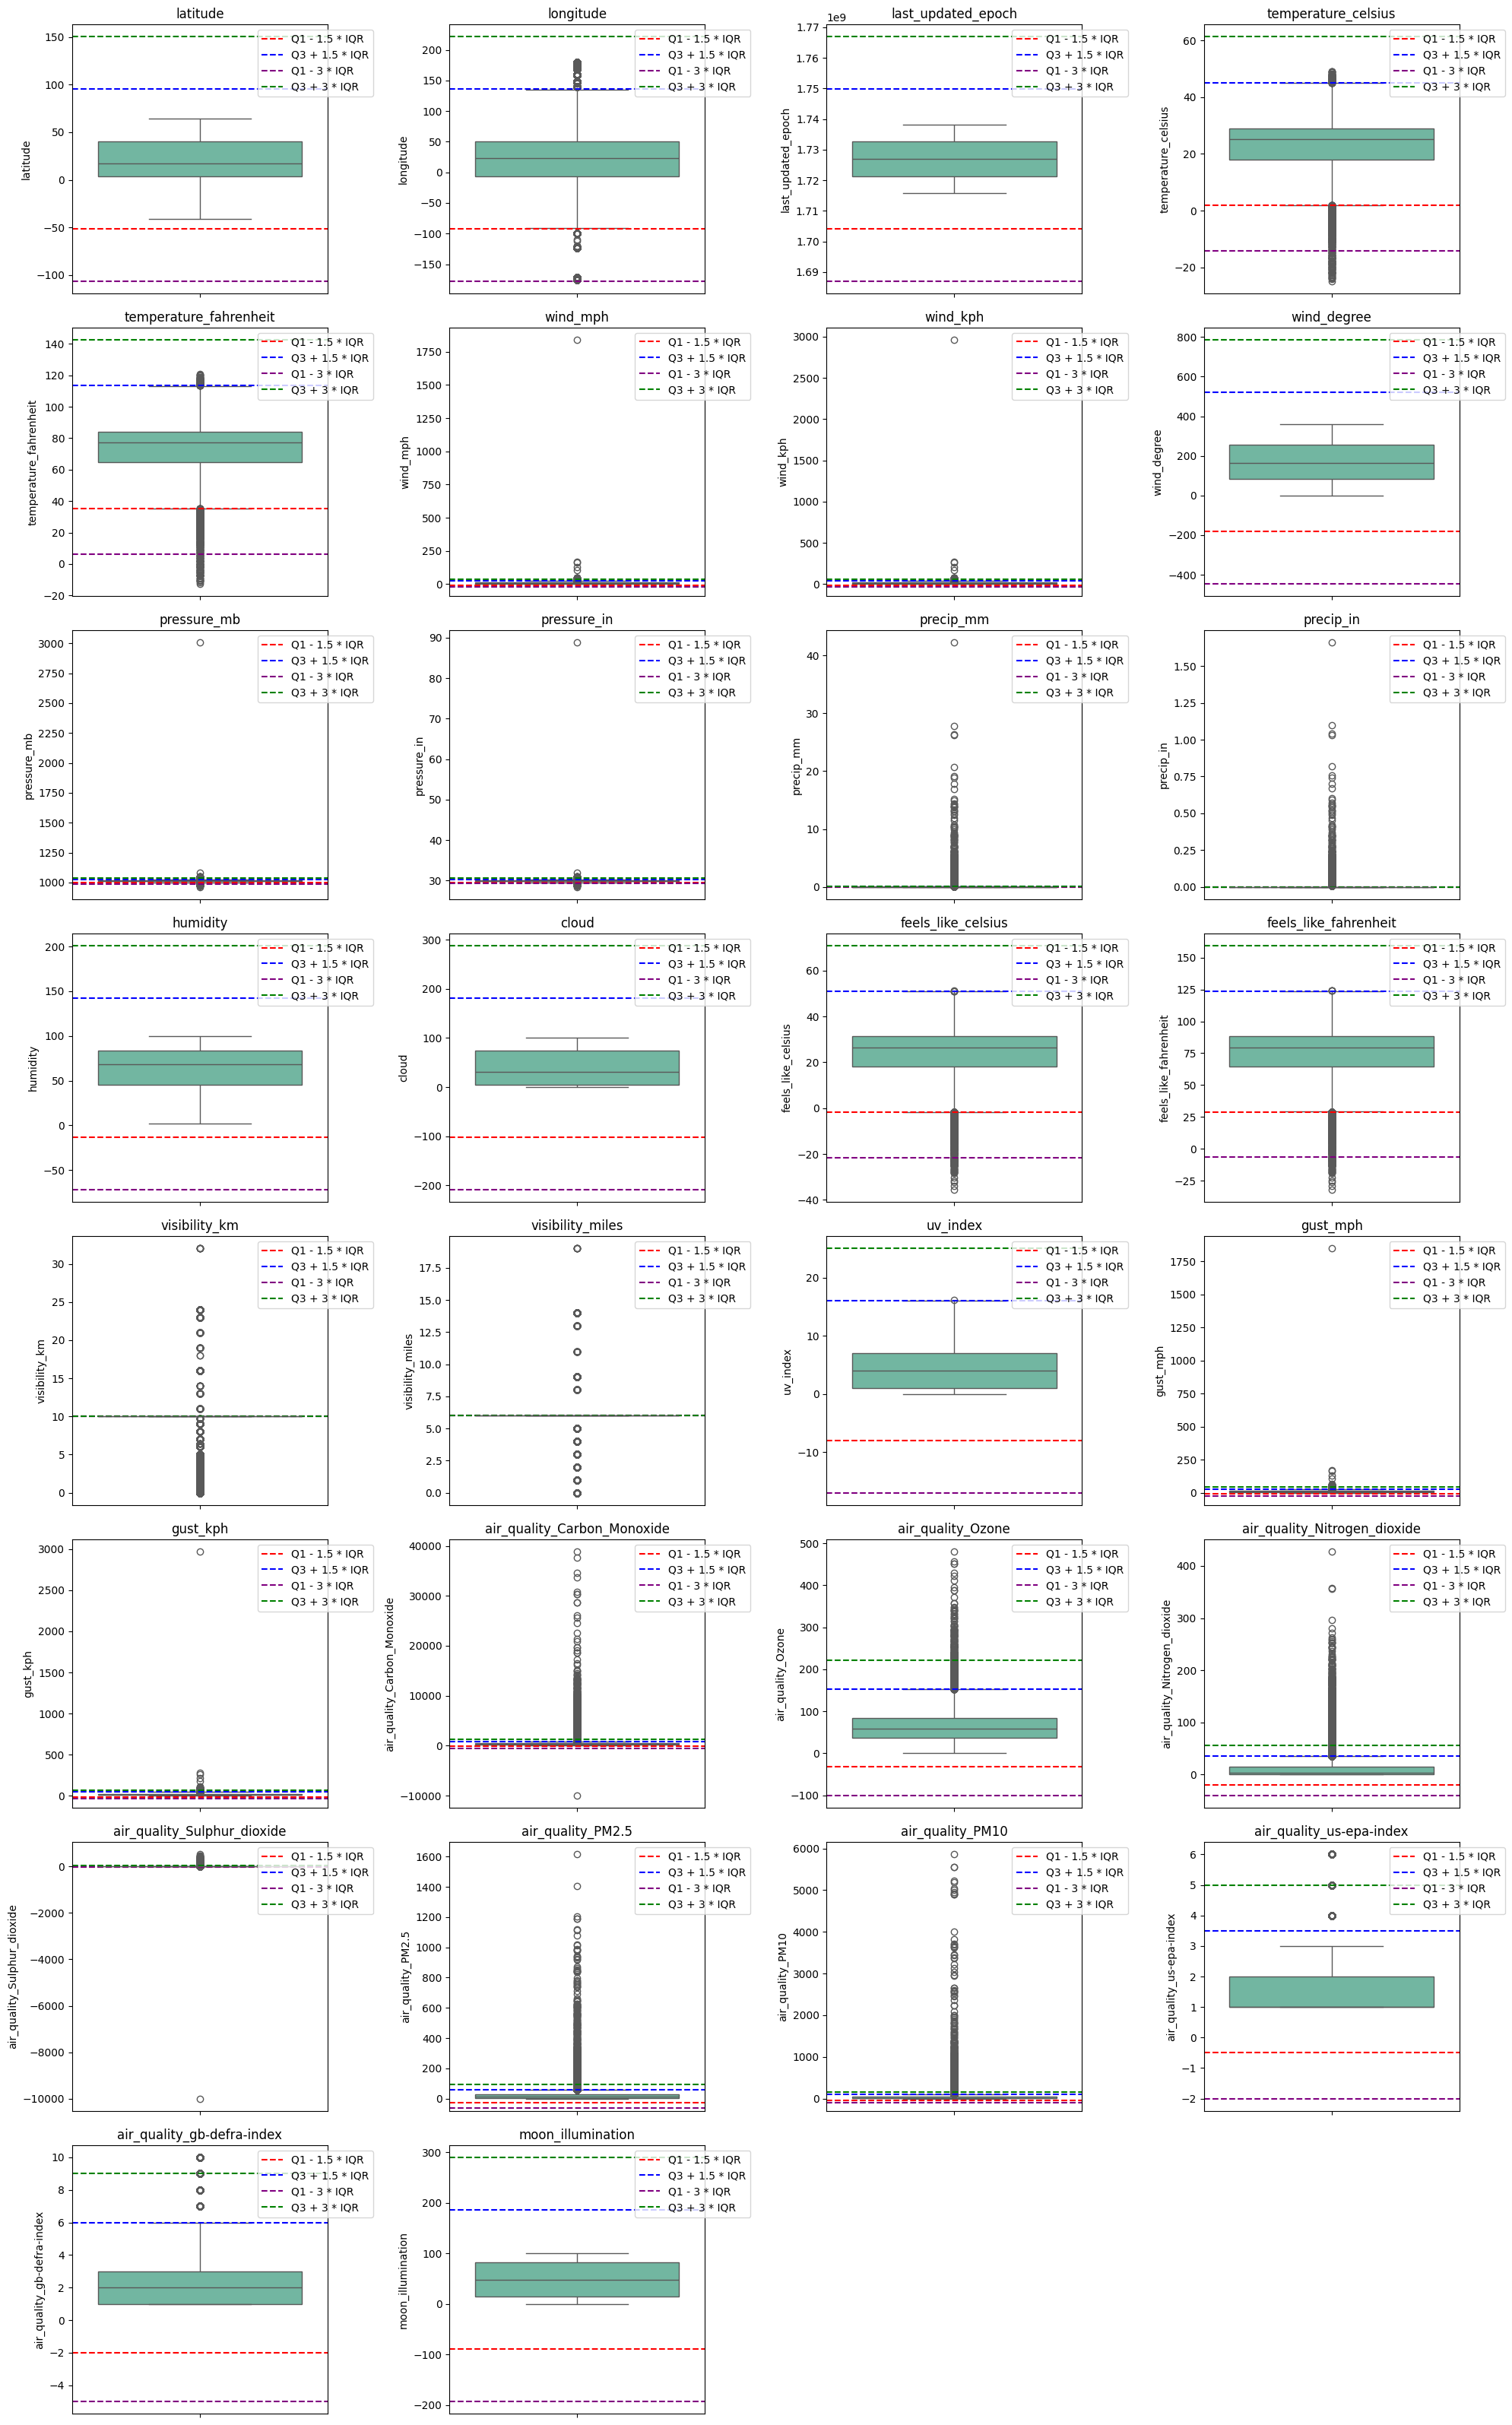

In [ ]:
numeric_columns = df.select_dtypes(include=['number']).columns

# Calculate IQR and identify outliers, extreme outliers
outliers = {}
extreme_outliers = {}
outliers_mask = pd.Series(False, index=df.index)
extreme_outliers_mask = pd.Series(False, index=df.index)

# Set up the matplotlib figure
num_cols = 4
num_rows = (len(numeric_columns) + num_cols - 1) // num_cols

plt.figure(figsize=(20, num_rows * 4))

# Create boxplots
for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=df[column], palette='Set2')

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    extreme_lower_bound = Q1 - 3 * IQR
    extreme_upper_bound = Q3 + 3 * IQR

    # Identify outliers, extreme outliers

    outliers[column] = (df[column] < lower_bound) | (df[column] > upper_bound)
    extreme_outliers[column] = (df[column] < extreme_lower_bound) | (df[column] > extreme_upper_bound)

    outliers_mask |= (df[column] < lower_bound) | (df[column] > upper_bound)
    extreme_outliers_mask |= (df[column] < extreme_lower_bound) | (df[column] > extreme_upper_bound)

    # Add lines for lower and upper bounds to detect the outliers
    plt.axhline(y=lower_bound, color='red', linestyle='--', label='Q1 - 1.5 * IQR')
    plt.axhline(y=upper_bound, color='blue', linestyle='--', label='Q3 + 1.5 * IQR')
    plt.axhline(y=extreme_lower_bound, color='purple', linestyle='--', label='Q1 - 3 * IQR')
    plt.axhline(y=extreme_upper_bound, color='green', linestyle='--', label='Q3 + 3 * IQR')

    plt.title(column)
    plt.xlabel('')

    # Add the legend outside the boxplot area
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

plt.tight_layout()
plt.show()

df['outliers'] = outliers_mask
df['extreme_outliers'] = extreme_outliers_mask






In [ ]:
print(f'Size of dataset: {df.shape[0]}')

df_outliers = df[df['outliers'] == True]
print(f'Number of outliers: {df_outliers.shape[0]}')

df_extreme_outliers = df[df['extreme_outliers'] == True]
print(f'Number of extreme outliers: {df_extreme_outliers.shape[0]}')

df_without_outliers = df[df['outliers'] == False]
print(f'Shape of df without outliers: {df_without_outliers.shape}')

df_without_extreme_outliers = df[df['extreme_outliers'] == False]
print(f'Shape of df without extreme outliers: {df_without_extreme_outliers.shape}')

Size of dataset: 50280
Number of outliers: 28986
Number of extreme outliers: 20526
Shape of df without outliers: (21294, 43)
Shape of df without extreme outliers: (29754, 43)


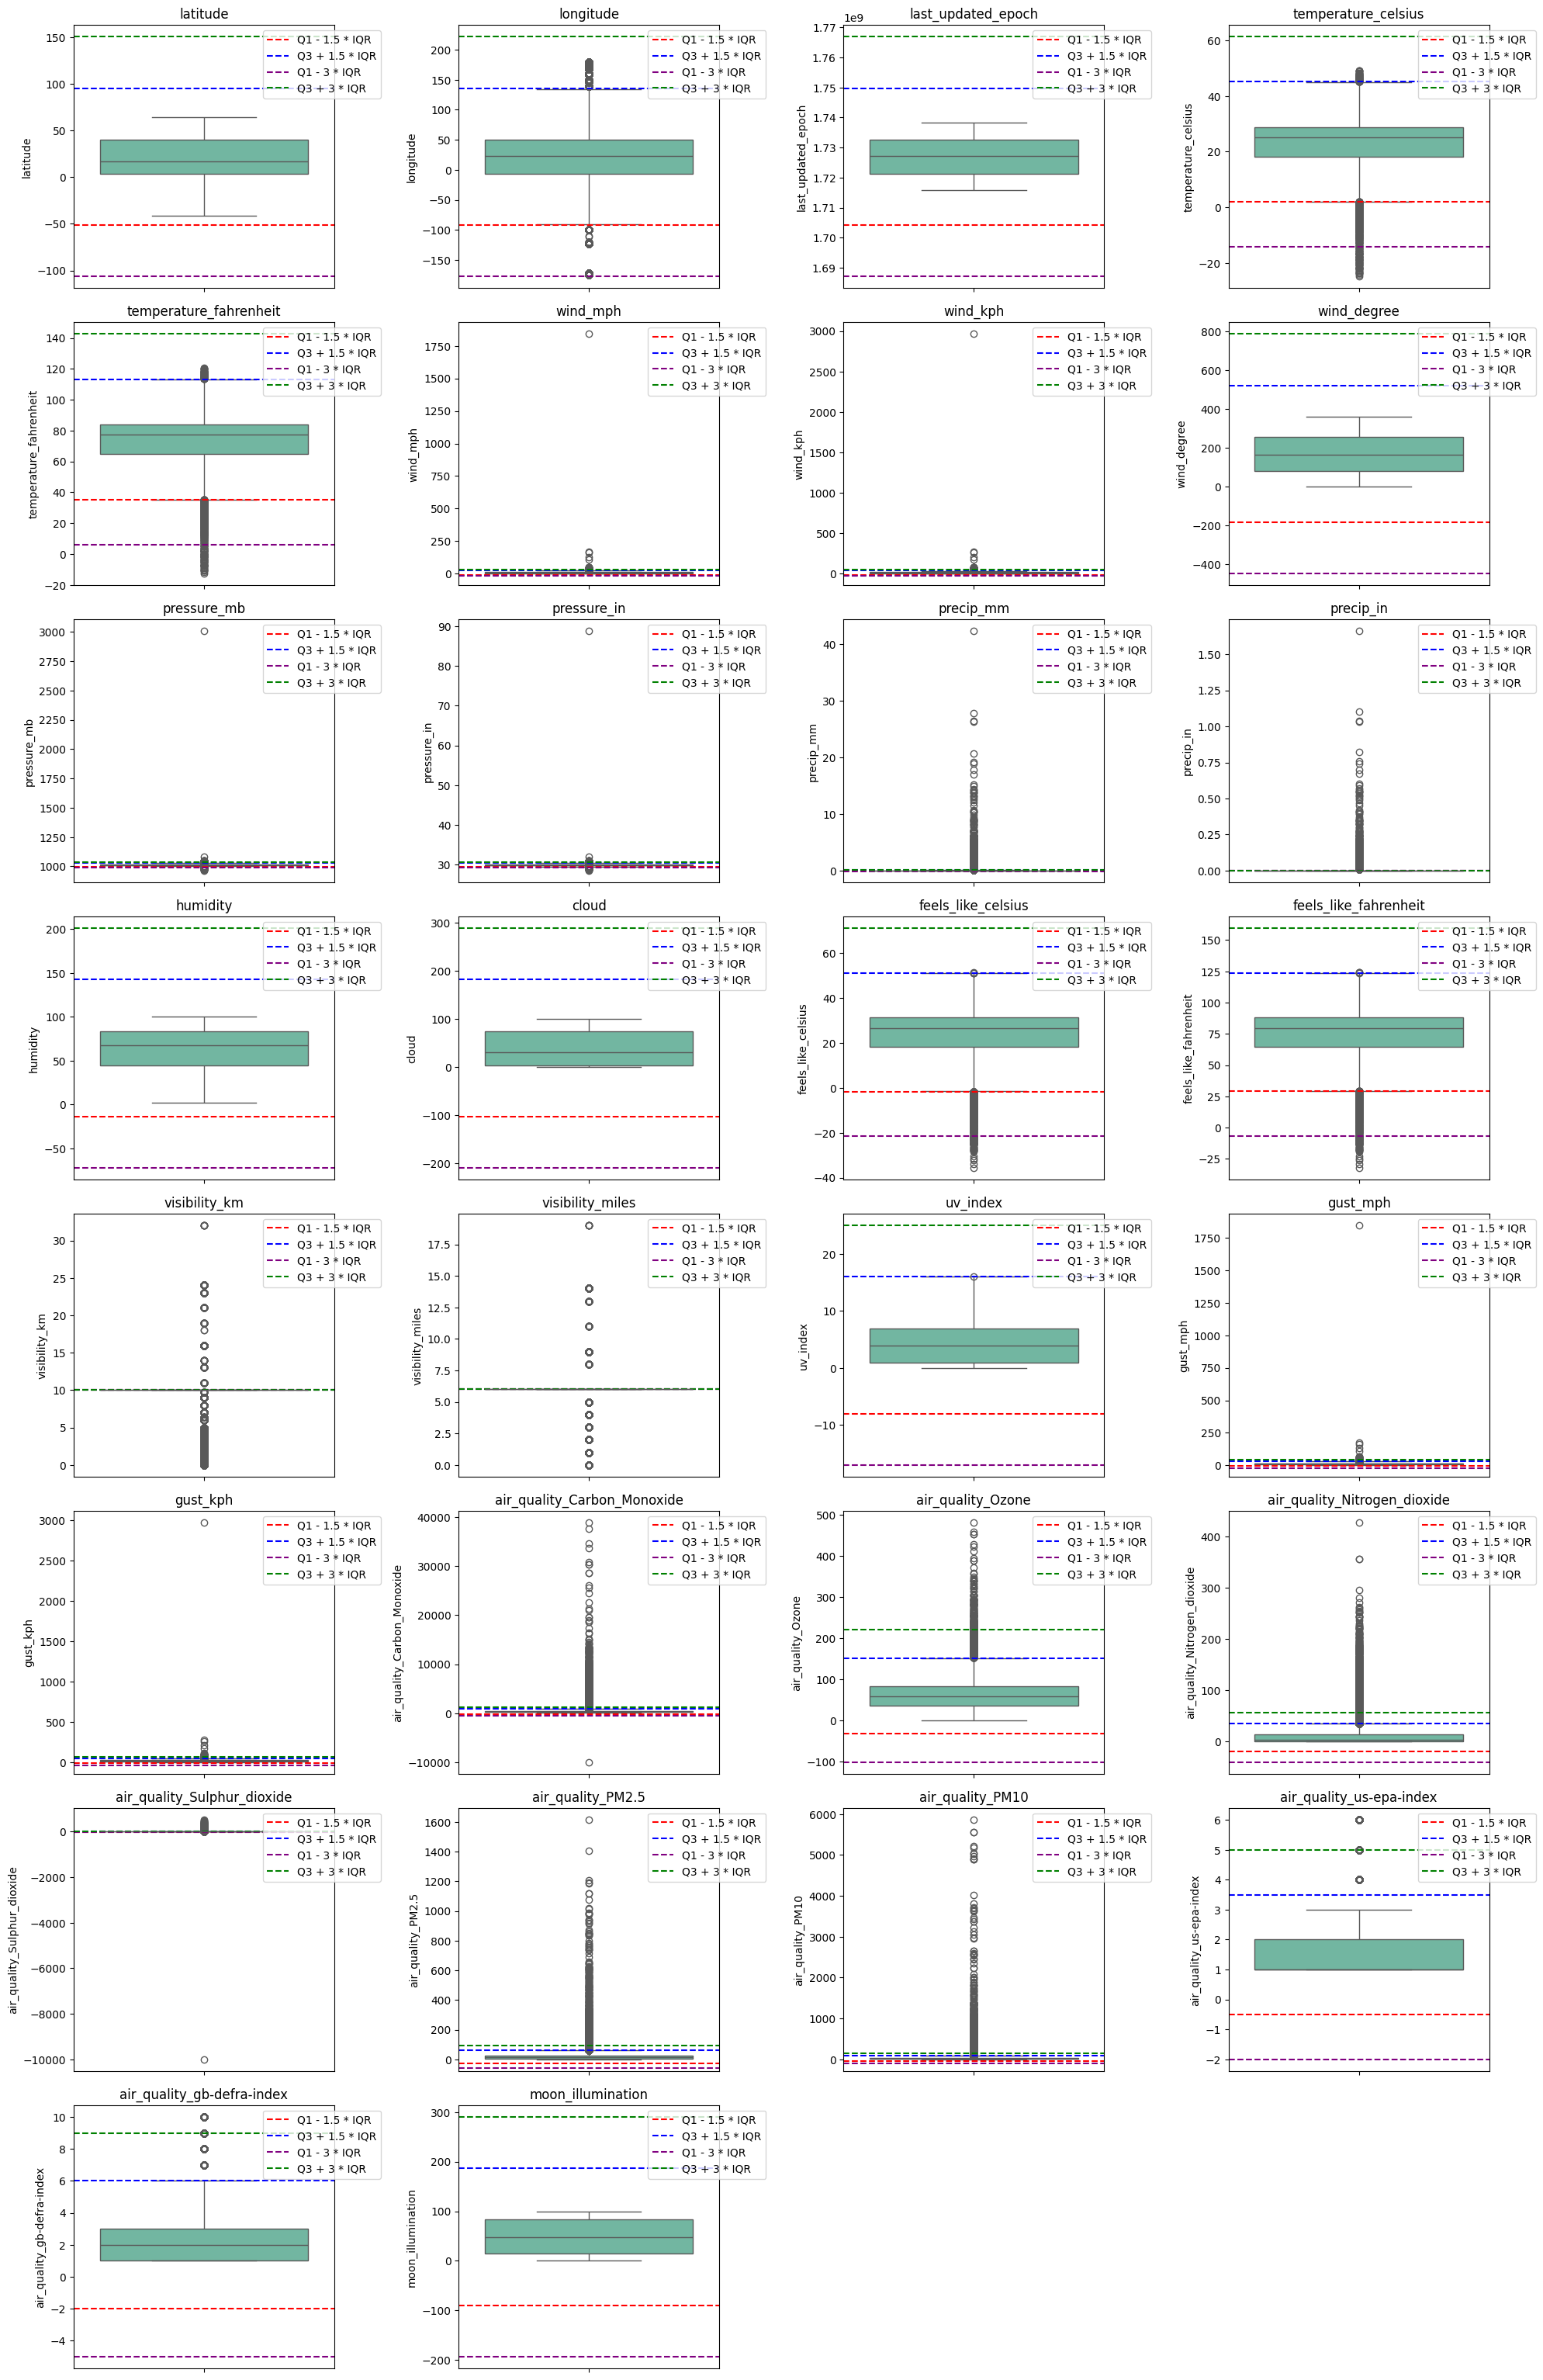

In [ ]:
num_cols = 4
num_rows = (len(numeric_columns) + num_cols - 1) // num_cols

plt.figure(figsize=(20, num_rows * 4))

# Create boxplots
for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=df[column], palette='Set2')

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    extreme_lower_bound = Q1 - 3 * IQR
    extreme_upper_bound = Q3 + 3 * IQR

    # Identify outliers, extreme outliers

    outliers[column] = (df[column] < lower_bound) | (df[column] > upper_bound)
    extreme_outliers[column] = (df[column] < extreme_lower_bound) | (df[column] > extreme_upper_bound)

    outliers_mask |= (df[column] < lower_bound) | (df[column] > upper_bound)
    extreme_outliers_mask |= (df[column] < extreme_lower_bound) | (df[column] > extreme_upper_bound)

    # Add lines for lower and upper bounds to detect the outliers
    plt.axhline(y=lower_bound, color='red', linestyle='--', label='Q1 - 1.5 * IQR')
    plt.axhline(y=upper_bound, color='blue', linestyle='--', label='Q3 + 1.5 * IQR')
    plt.axhline(y=extreme_lower_bound, color='purple', linestyle='--', label='Q1 - 3 * IQR')
    plt.axhline(y=extreme_upper_bound, color='green', linestyle='--', label='Q3 + 3 * IQR')

    plt.title(column)
    plt.xlabel('')
    plt.legend(loc='upper right',bbox_to_anchor=(1.2,1))

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()




In [ ]:
df_without_extreme_outliers.select_dtypes(include=['number']).columns

Index(['latitude', 'longitude', 'last_updated_epoch', 'temperature_celsius',
       'temperature_fahrenheit', 'wind_mph', 'wind_kph', 'wind_degree',
       'pressure_mb', 'pressure_in', 'precip_mm', 'precip_in', 'humidity',
       'cloud', 'feels_like_celsius', 'feels_like_fahrenheit', 'visibility_km',
       'visibility_miles', 'uv_index', 'gust_mph', 'gust_kph',
       'air_quality_Carbon_Monoxide', 'air_quality_Ozone',
       'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide',
       'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index',
       'air_quality_gb-defra-index', 'moon_illumination'],
      dtype='object')

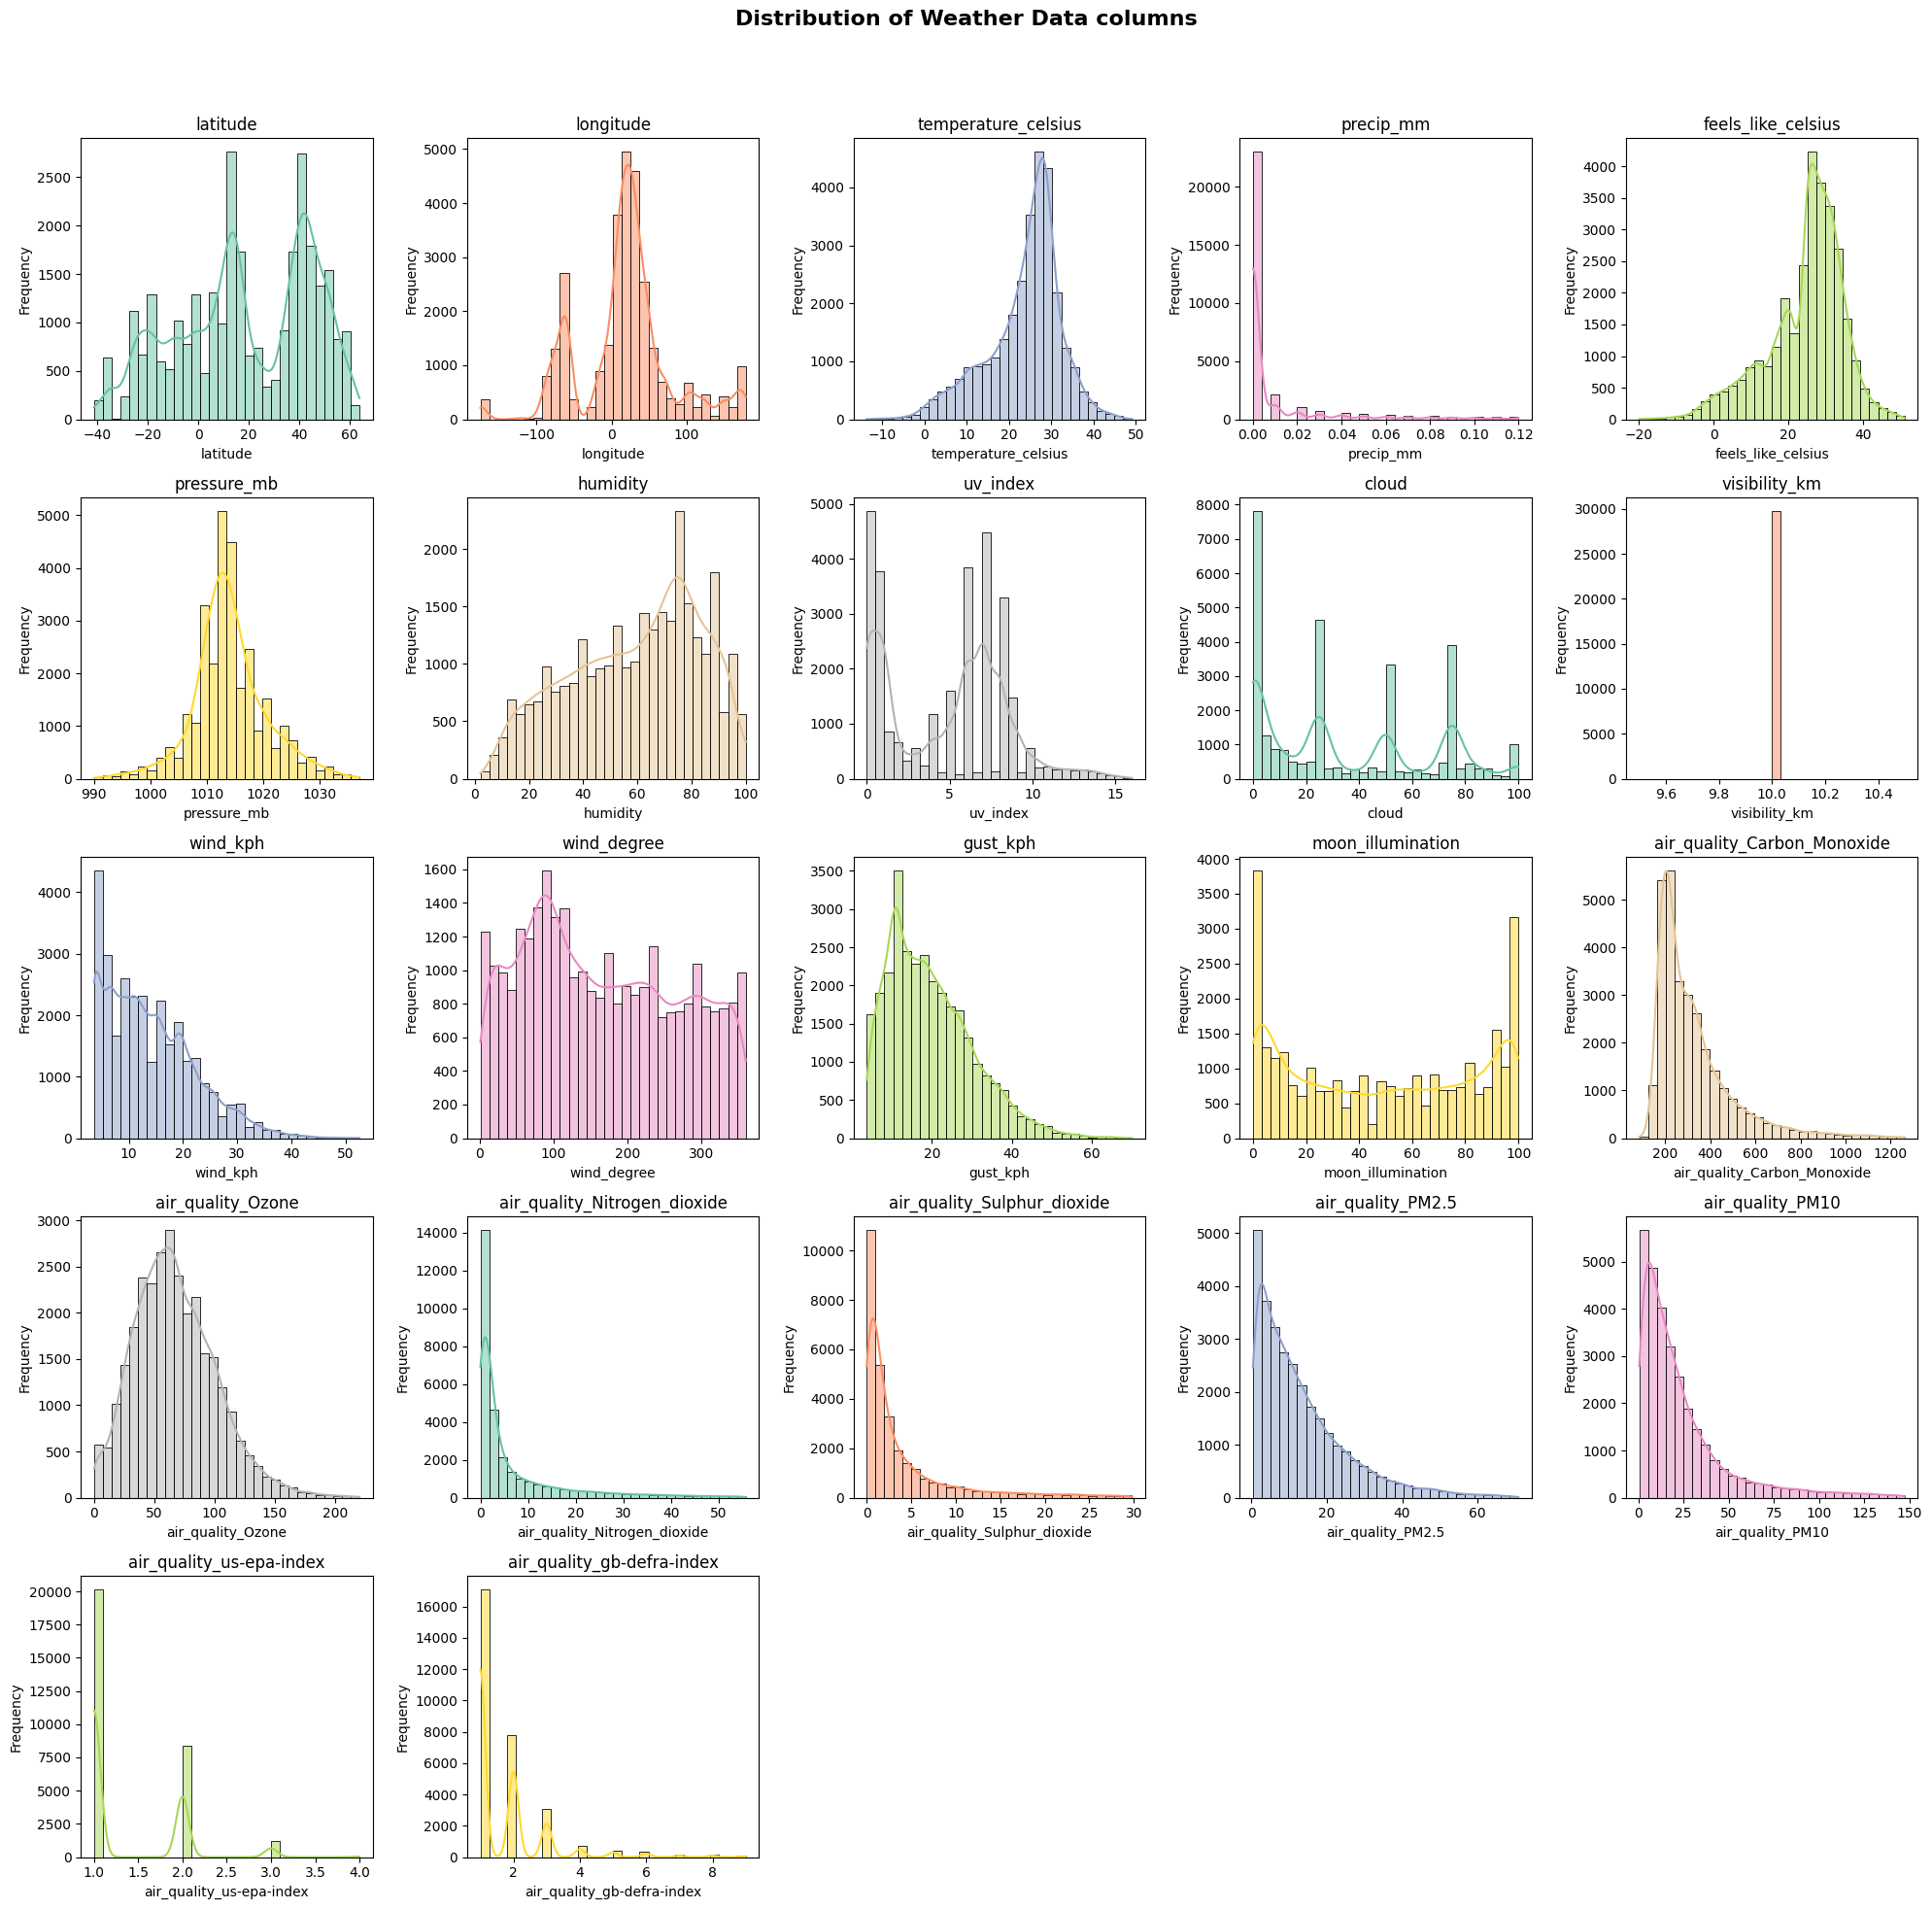

In [ ]:
# selected_columns = df_without_extreme_outliers.select_dtypes(include=['number']).columns

# Specify the columns to visualize
selected_columns = ['latitude', 'longitude', 'temperature_celsius', 'precip_mm', 'feels_like_celsius',
    'pressure_mb', 'humidity', 'uv_index', 'cloud', 'visibility_km',
    'wind_kph', 'wind_degree', 'gust_kph', 'moon_illumination',

    'air_quality_Carbon_Monoxide', 'air_quality_Ozone',
    'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide',
    'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index',
    'air_quality_gb-defra-index',]

# Create a figure for the subplots
n_cols = 5
n_rows = (len(selected_columns) + n_cols - 1) // n_cols  # Calculate number of rows needed
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy indexing

# Get the SET2 color palette
set2_palette = sns.color_palette("Set2", n_colors=len(selected_columns))

# Loop through the selected columns and create plots
for i, col in enumerate(selected_columns):
    sns.histplot(df_without_extreme_outliers[col], ax=axes[i], bins=30, kde=True, color=set2_palette[i])
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add the title
plt.suptitle('Distribution of Weather Data columns', fontsize=16, fontweight='bold')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

MA - MAE: 3.22
MA - RMSE: 4.14


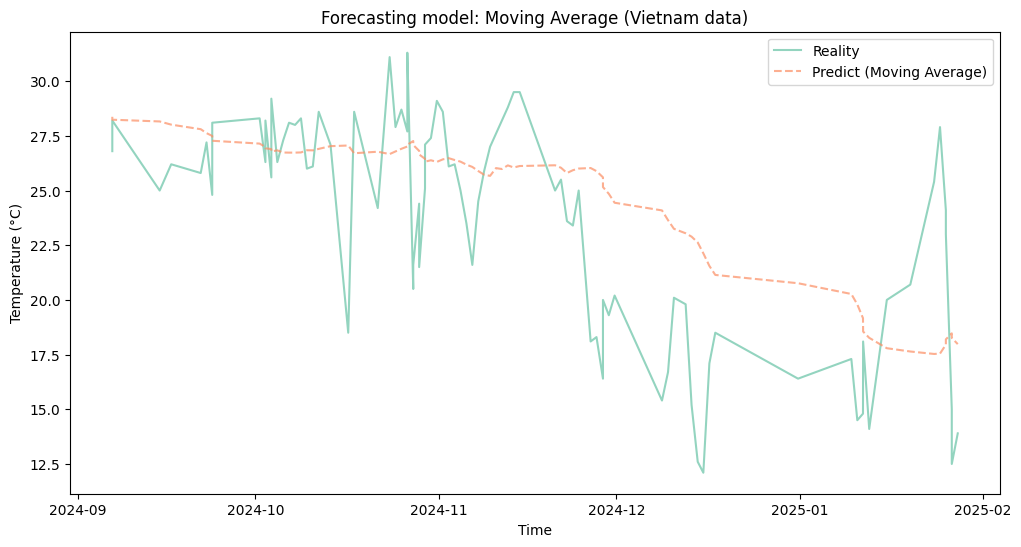

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt


new_df = df_without_extreme_outliers[df_without_extreme_outliers['country'] == "Vietnam"].copy()
new_df['last_updated'] = pd.to_datetime(new_df['last_updated'])
new_df = new_df.sort_values(by='last_updated')

# 2. Apply MA
window_size = 24
new_df['moving_avg'] = new_df['temperature_celsius'].rolling(window=window_size).mean()

# 3. Predict
new_df['forecast'] = new_df['moving_avg'].shift(1)

# 4. Evaluate
new_df.dropna(inplace=True)
mae = mean_absolute_error(new_df['temperature_celsius'], new_df['forecast'])
rmse = np.sqrt(mean_squared_error(new_df['temperature_celsius'], new_df['forecast']))

print(f"MA - MAE: {mae:.2f}")
print(f"MA - RMSE: {rmse:.2f}")

# 5. Reality vs Predict
plt.figure(figsize=(12, 6))
plt.plot(new_df['last_updated'], new_df['temperature_celsius'], label="Reality", alpha=0.7)
plt.plot(new_df['last_updated'], new_df['forecast'], label="Predict (Moving Average)", linestyle="dashed", alpha=0.7)
plt.legend()
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.title("Forecasting model: Moving Average (Vietnam data)")
plt.show()

EMA - MAE: 3.00
EMA - RMSE: 3.82


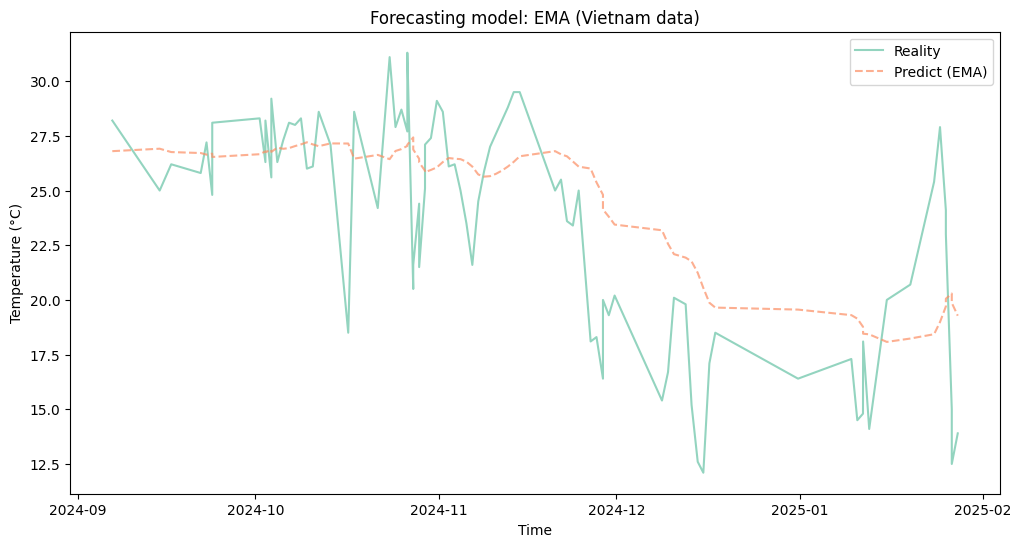

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Apply EMA
span = 24
new_df['ema'] = new_df['temperature_celsius'].ewm(span=span, adjust=False).mean()

# 2. Predict
new_df['forecast_ema'] = new_df['ema'].shift(1)

# 3. Evaluate
new_df.dropna(inplace=True)
mae_ema = mean_absolute_error(new_df['temperature_celsius'], new_df['forecast_ema'])
rmse_ema = np.sqrt(mean_squared_error(new_df['temperature_celsius'], new_df['forecast_ema']))

print(f"EMA - MAE: {mae_ema:.2f}")
print(f"EMA - RMSE: {rmse_ema:.2f}")

# 4. Reality vs Predict
plt.figure(figsize=(12, 6))
plt.plot(new_df['last_updated'], new_df['temperature_celsius'], label="Reality", alpha=0.7)
plt.plot(new_df['last_updated'], new_df['forecast_ema'], label="Predict (EMA)", linestyle="dashed", alpha=0.7)
plt.legend()
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.title("Forecasting model: EMA (Vietnam data)")
plt.show()